In [3]:
import pandas as pd

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
df = pd.read_csv(url, header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
print("Shape",df.shape)
df.info()


Shape (32561, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       32561 non-null  int64 
 1   1       32561 non-null  object
 2   2       32561 non-null  int64 
 3   3       32561 non-null  object
 4   4       32561 non-null  int64 
 5   5       32561 non-null  object
 6   6       32561 non-null  object
 7   7       32561 non-null  object
 8   8       32561 non-null  object
 9   9       32561 non-null  object
 10  10      32561 non-null  int64 
 11  11      32561 non-null  int64 
 12  12      32561 non-null  int64 
 13  13      32561 non-null  object
 14  14      32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [7]:
df.columns = [
    "age", "workclass", "fnlwgt", "education", "education-num", "marital-status",
    "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss",
    "hours-per-week", "native-country", "income"
]
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [9]:
df=df.replace(' ?',pd.NA)
print("\nMissing Values\n")
print(df.isnull().sum())


Missing Values

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income               0
dtype: int64


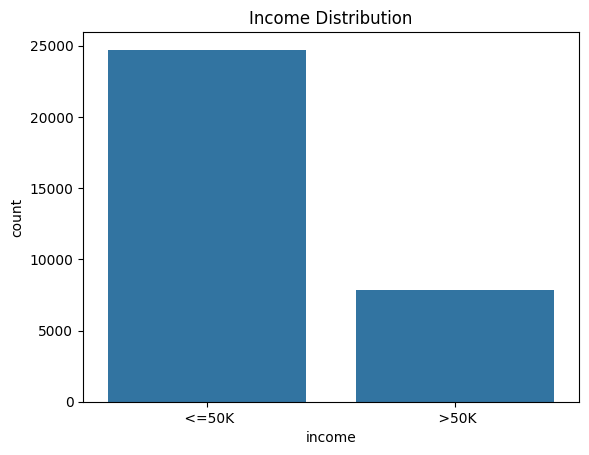

income
<=50K    75.919044
>50K     24.080956
Name: proportion, dtype: float64

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x="income", data=df)
plt.title("Income Distribution")
plt.show()

df["income"].value_counts(normalize=True) * 100



workclass - Unique values: 8
workclass
Private             0.738682
Self-emp-not-inc    0.082701
Local-gov           0.068120
State-gov           0.042246
Self-emp-inc        0.036322
Name: proportion, dtype: float64

education - Unique values: 16
education
HS-grad         0.322502
Some-college    0.223918
Bachelors       0.164461
Masters         0.052916
Assoc-voc       0.042443
Name: proportion, dtype: float64

marital-status - Unique values: 7
marital-status
Married-civ-spouse    0.459937
Never-married         0.328092
Divorced              0.136452
Separated             0.031479
Widowed               0.030497
Name: proportion, dtype: float64

occupation - Unique values: 14
occupation
Prof-specialty     0.134774
Craft-repair       0.133440
Exec-managerial    0.132365
Adm-clerical       0.122729
Sales              0.118823
Name: proportion, dtype: float64

relationship - Unique values: 6
relationship
Husband          0.405178
Not-in-family    0.255060
Own-child        0.155646
Unmar

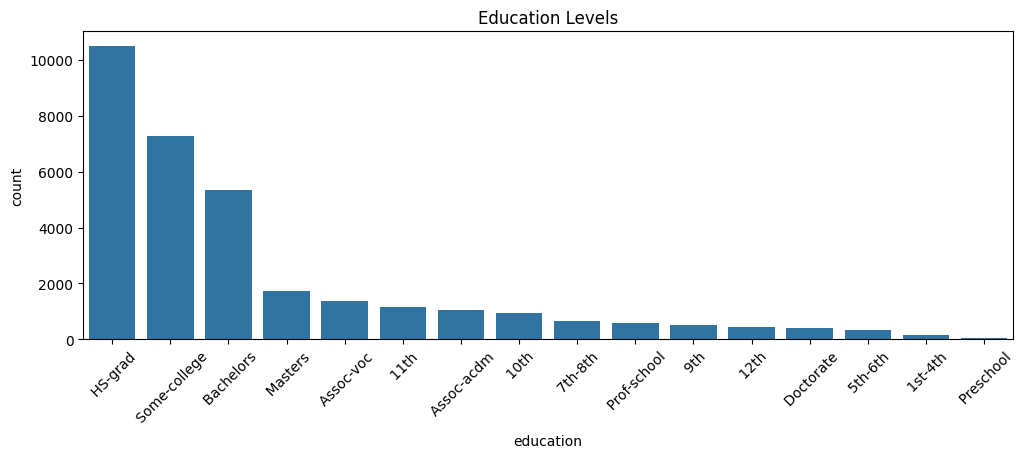

In [12]:
categorical_cols=df.select_dtypes(include='object').columns
for col in categorical_cols:
    print(f"\n{col} - Unique values: {df[col].nunique()}")
    print(df[col].value_counts(normalize=True).head(5))

plt.figure(figsize=(12, 4))
sns.countplot(x="education", data=df, order=df["education"].value_counts().index)
plt.xticks(rotation=45)
plt.title("Education Levels")
plt.show()

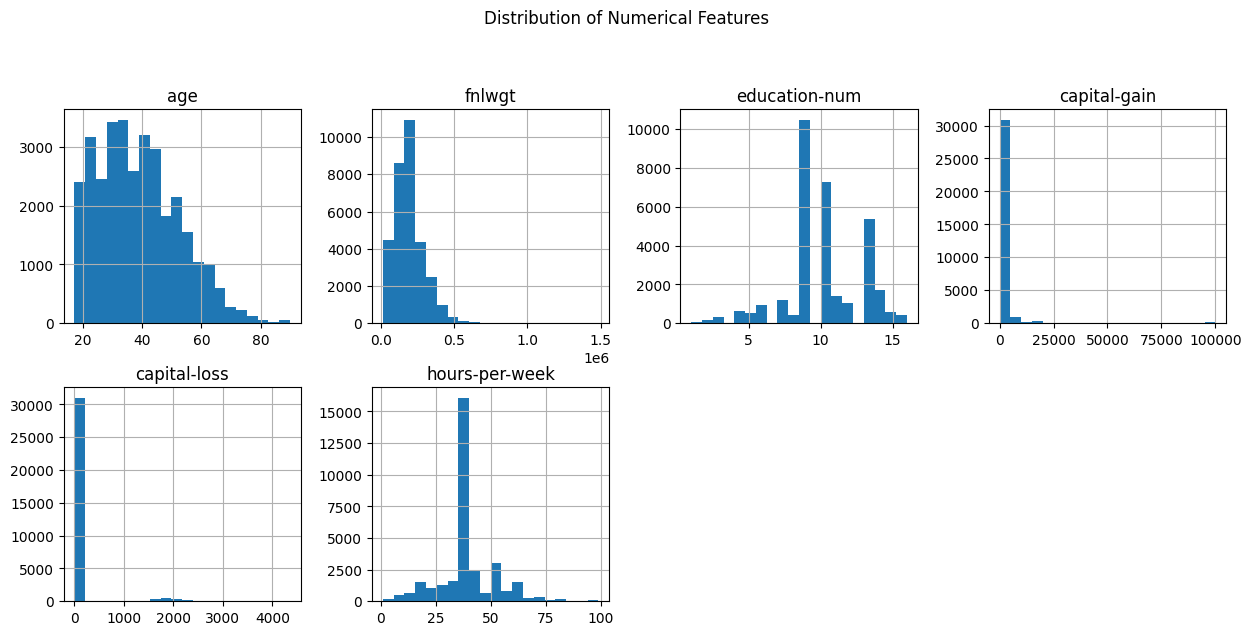

In [15]:
numerical_cols=df.select_dtypes(include=['int64','float64']).columns
df[numerical_cols].describe()
df[numerical_cols].hist(bins=20, figsize=(15, 10), layout=(3, 4))
plt.suptitle("Distribution of Numerical Features")
plt.show()

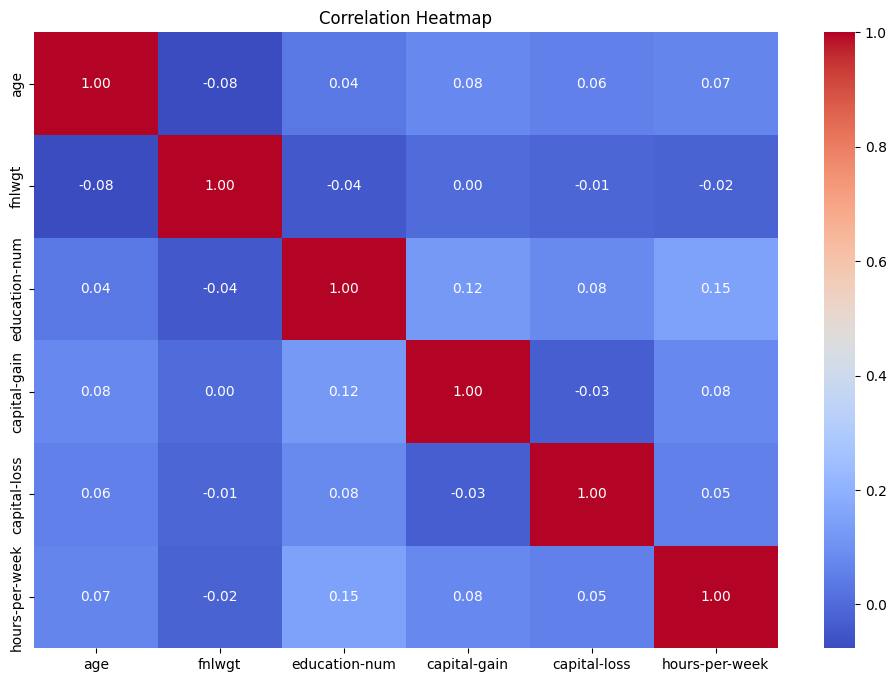

In [17]:
plt.figure(figsize=(12, 8))
sns.heatmap(df[numerical_cols].corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


In [18]:
df.dropna(inplace=True)

In [19]:
categorical_cols = df.select_dtypes(include='object').drop(columns='income').columns
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

In [21]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_encoded['income'] = le.fit_transform(df_encoded['income'])

In [22]:
from sklearn.model_selection import train_test_split
X = df_encoded.drop('income', axis=1)
y = df_encoded['income']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.2, random_state=42, stratify=y)

In [23]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [26]:
from sklearn.metrics import accuracy_score, precision_score, recall_score , f1_score, roc_auc_score
def evaluate_model(y_true, y_pred, y_prob=None):
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred))
    print("Recall:", recall_score(y_true, y_pred))
    print("F1 Score:", f1_score(y_true, y_pred))
    if y_prob is not None :
        print("ROC AUC Score:", roc_auc_score(y_true, y_prob))

In [29]:
from sklearn.linear_model import LogisticRegression 
lr = LogisticRegression(max_iter=100)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
y_prob_lr = lr.predict_proba(X_test)[:,1]
print("Logistic Regression Results")
evaluate_model(y_test, y_pred_lr, y_prob_lr)

Logistic Regression Results
Accuracy: 0.8473396320238687
Precision: 0.734085414987913
Recall: 0.6065246338215713
F1 Score: 0.6642362376959533
ROC AUC Score: 0.902300647617346


K-Nearest Neighbors (k=7) Results:
Accuracy: 0.8216476048400464
Precision: 0.6625954198473283
Recall: 0.5778961384820239
F1 Score: 0.6173541963015647
ROC AUC Score: 0.8596875614387174


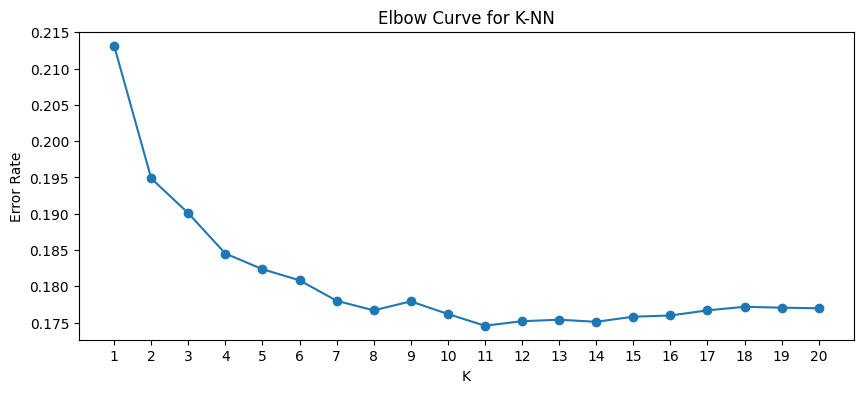

In [34]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)
y_prob_knn = knn.predict_proba(X_test)[:, 1]

print("K-Nearest Neighbors (k=7) Results:")
evaluate_model(y_test, y_pred_knn, y_prob_knn)
error_rates = []
from sklearn.model_selection import cross_val_score

for k in range(1, 21):
    model = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    error_rates.append(1 - scores.mean())

plt.figure(figsize=(10, 4))
plt.plot(range(1, 21), error_rates, marker='o')
plt.xlabel("K")
plt.ylabel("Error Rate")
plt.title("Elbow Curve for K-NN")
plt.xticks(range(1, 21))
plt.show()


Decision Tree Results:
Accuracy: 0.8140228741919443
Precision: 0.6254953764861294
Recall: 0.6304926764314248
F1 Score: 0.6279840848806366
ROC AUC Score: 0.7526773688932671


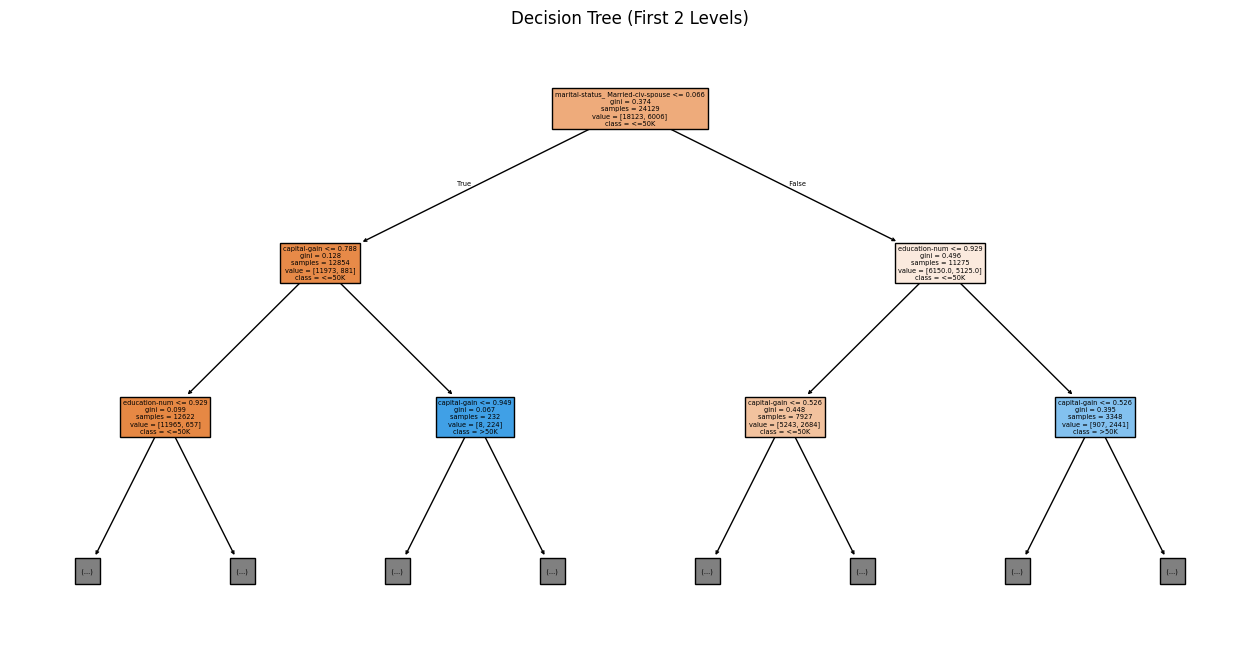

In [36]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)
y_prob_dt = dt.predict_proba(X_test)[:, 1]

print("Decision Tree Results:")
evaluate_model(y_test, y_pred_dt, y_prob_dt)

from sklearn.tree import plot_tree

plt.figure(figsize=(16, 8))
plot_tree(dt, filled=True, feature_names=X.columns, class_names=["<=50K", ">50K"], max_depth=2)
plt.title("Decision Tree (First 2 Levels)")
plt.show()

Random Forest Classifier
Accuracy: 0.8486656721365822
Precision: 0.7295401402961809
Recall: 0.6231691078561917
F1 Score: 0.6721723518850987
ROC AUC Score: 0.90237250061053


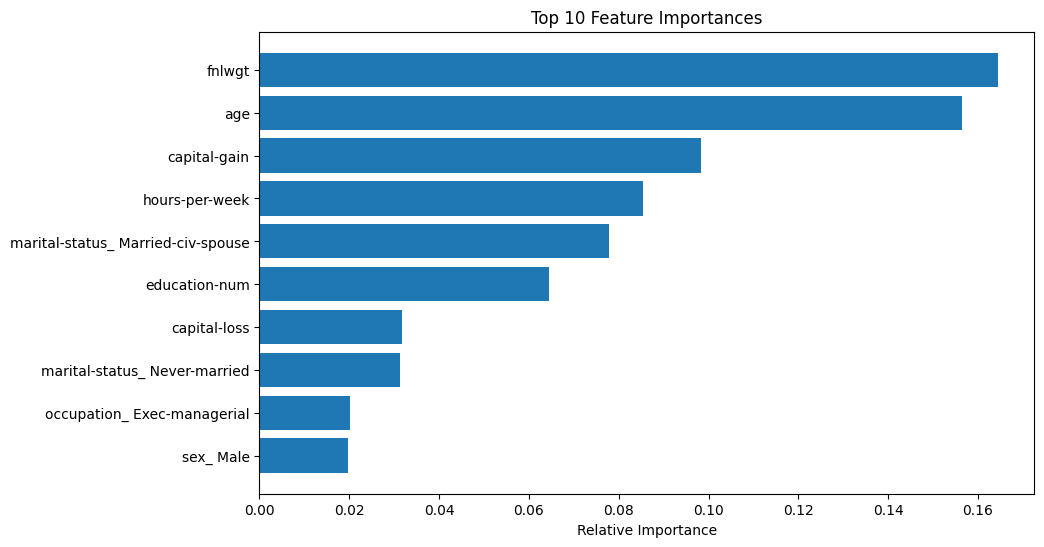

In [38]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
y_prob_rf = rf.predict_proba(X_test)[:,1]
print("Random Forest Classifier")
evaluate_model(y_test, y_pred_rf, y_prob_rf)

import numpy as np

importances = rf.feature_importances_
indices = np.argsort(importances)[-10:]  # top 10 features

plt.figure(figsize=(10, 6))
plt.title("Top 10 Feature Importances")
plt.barh(range(len(indices)), importances[indices], align="center")
plt.yticks(range(len(indices)), [X.columns[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()


In [39]:
pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 253.9/253.9 MB 9.0 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.3/322.3 MB 6.9 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [xgboost]m1/2 [xgboost]
Note: you may need to restart the kernel to use updated packages.


In [43]:
from xgboost import XGBClassifier

xgb = XGBClassifier(eval_metric='logloss', random_state=42)
xgb.fit(X_train, y_train)

y_pred_xgb = xgb.predict(X_test)
y_prob_xgb = xgb.predict_proba(X_test)[:, 1]

print(" XGBoost Results:")
evaluate_model(y_test, y_pred_xgb, y_prob_xgb)



 XGBoost Results:
Accuracy: 0.8630863583623405
Precision: 0.7686804451510334
Recall: 0.6438082556591211
F1 Score: 0.7007246376811594
ROC AUC Score: 0.9226621548668574


In [44]:
from sklearn.svm import SVC
svm = SVC(probability=True, kernel='linear', random_state=42)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
y_prob_svm = svm.predict_proba(X_test)[:,1]
print("SVM(Linear) Results")
evaluate_model(y_test, y_pred_svm, y_prob_svm)

SVM(Linear) Results
Accuracy: 0.8465108569534229
Precision: 0.7474226804123711
Recall: 0.5792276964047937
F1 Score: 0.6526631657914479
ROC AUC Score: 0.8996539888990799


In [45]:
#Lets Try with A RBF Kernel aswell 
from sklearn.svm import SVC
rbf_svm = SVC(probability=True, kernel='rbf', random_state=42)
rbf_svm.fit(X_train, y_train)
y_pred_rbf_svm = rbf_svm.predict(X_test)
y_prob_rbf_svm = rbf_svm.predict_proba(X_test)[:,1]
print("SVM(Linear) Results")
evaluate_model(y_test, y_pred_rbf_svm, y_prob_rbf_svm)

SVM(Linear) Results
Accuracy: 0.846676611967512
Precision: 0.7497835497835498
Recall: 0.5765645805592543
F1 Score: 0.6518630033872789
ROC AUC Score: 0.8942103532375432


In [46]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)
y_prob_nb = nb.predict_proba(X_test)[:,1]
print("Naive Bayes Results ")
evaluate_model(y_test, y_pred_nb, y_prob_nb)

Naive Bayes Results 
Accuracy: 0.5236200895077076
Precision: 0.3387400094029149
Recall: 0.9593874833555259
F1 Score: 0.5006949270326616
ROC AUC Score: 0.7174635981569194


In [48]:
from sklearn.neural_network import MLPClassifier 
mlp = MLPClassifier(hidden_layer_sizes=(64,32), max_iter=600, random_state=42)
mlp.fit(X_train, y_train)
y_pred_mlp = mlp.predict(X_test)
y_prob_mlp = mlp.predict_proba(X_test)[:,1]
print("MLP Nueral Network Results")
evaluate_model(y_test, y_pred_mlp, y_prob_mlp)

MLP Nueral Network Results
Accuracy: 0.8180009945300846
Precision: 0.6432624113475177
Recall: 0.6038615179760319
F1 Score: 0.6229395604395604
ROC AUC Score: 0.8621454040092501


Explained variance ratio: [0.03690213 0.0283319 ]


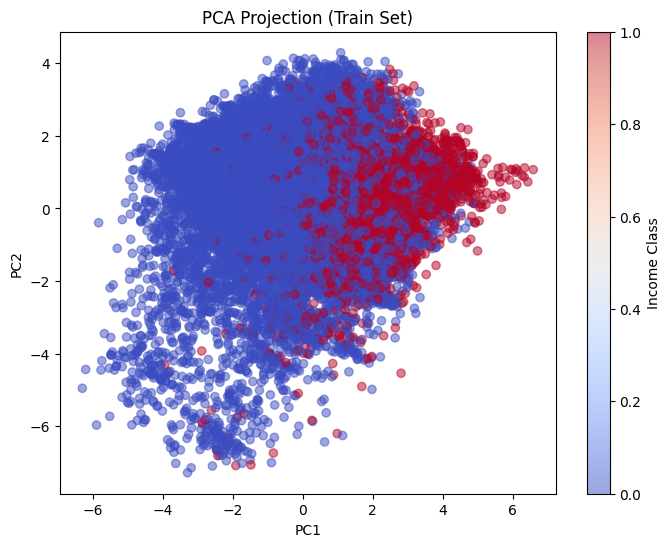

In [49]:
from sklearn.decomposition import PCA 
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train)

print("Explained variance ratio:", pca.explained_variance_ratio_)

# Plot
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train, cmap='coolwarm', alpha=0.5)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA Projection (Train Set)")
plt.colorbar(label="Income Class")
plt.show()

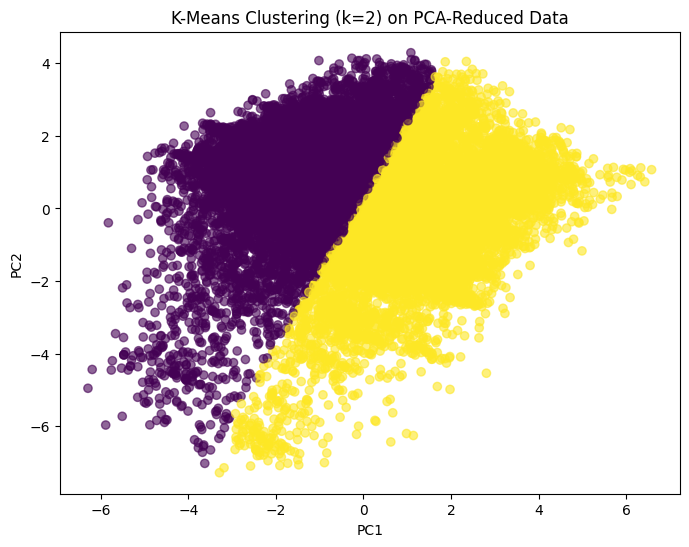

In [50]:
from sklearn.cluster import KMeans

# Fit KMeans to the PCA-transformed data
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(X_pca)

# Visualize clusters
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', alpha=0.6)
plt.title("K-Means Clustering (k=2) on PCA-Reduced Data")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

In [51]:
results = []

def store_results(model_name, y_true, y_pred, y_prob):
    results.append({
        "Model": model_name,
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred),
        "Recall": recall_score(y_true, y_pred),
        "F1 Score": f1_score(y_true, y_pred),
        "ROC AUC": roc_auc_score(y_true, y_prob)
    })

store_results("Logistic Regression", y_test, y_pred_lr, y_prob_lr)
store_results("KNN", y_test, y_pred_knn, y_prob_knn)
store_results("Decision Tree", y_test, y_pred_dt, y_prob_dt)
store_results("Random Forest", y_test, y_pred_rf, y_prob_rf)
store_results("XGBoost", y_test, y_pred_xgb, y_prob_xgb)
store_results("SVM", y_test, y_pred_svm, y_prob_svm)
store_results("Naive Bayes", y_test, y_pred_nb, y_prob_nb)
store_results("MLP", y_test, y_pred_mlp, y_prob_mlp)

results_df = pd.DataFrame(results)
results_df.sort_values(by="F1 Score", ascending=False).reset_index(drop=True)

,Model,Accuracy,Precision,Recall,F1 Score,ROC AUC
0,XGBoost,0.863086,0.768680,0.643808,0.700725,0.922662
1,Random Forest,0.848666,0.729540,0.623169,0.672172,0.902373
2,Logistic Regression,0.847340,0.734085,0.606525,0.664236,0.902301
3,SVM,0.846511,0.747423,0.579228,0.652663,0.899654
4,Decision Tree,0.814023,0.625495,0.630493,0.627984,0.752677
5,MLP,0.818001,0.643262,0.603862,0.622940,0.862145
6,KNN,0.821648,0.662595,0.577896,0.617354,0.859688
7,Naive Bayes,0.523620,0.338740,0.959387,0.500695,0.717464
